In [87]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [88]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [89]:
train_images.shape

(60000, 28, 28)

In [90]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

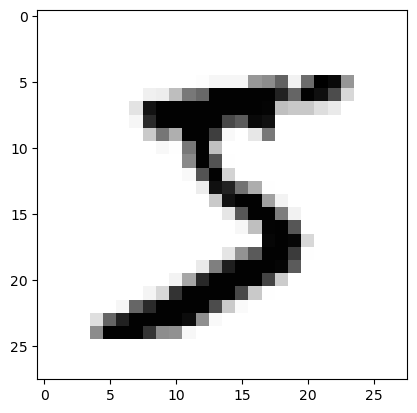

In [91]:
plt.imshow(train_images[0], cmap="Greys")

In [92]:
model = tf.keras.models.Sequential()

In [93]:
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [94]:
model.compile(optimizer='rmsprop',loss='mse', metrics=['accuracy'])

In [95]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

In [96]:
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

In [97]:
test_images.shape

(10000, 784)

In [98]:
train_images.shape

(60000, 784)

In [99]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [100]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0158 - accuracy: 0.9140
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0063 - accuracy: 0.9658
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0044 - accuracy: 0.9774
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0034 - accuracy: 0.9826
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9861


In [101]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy : ", test_acc)

313/313 [==============================] - 0s 766us/step - loss: 0.0034 - accuracy: 0.9814
Accuracy :  0.9814000129699707


In [102]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9889
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9907
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 0.9919
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0014 - accuracy: 0.9929
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0012 - accuracy: 0.9941


In [103]:
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

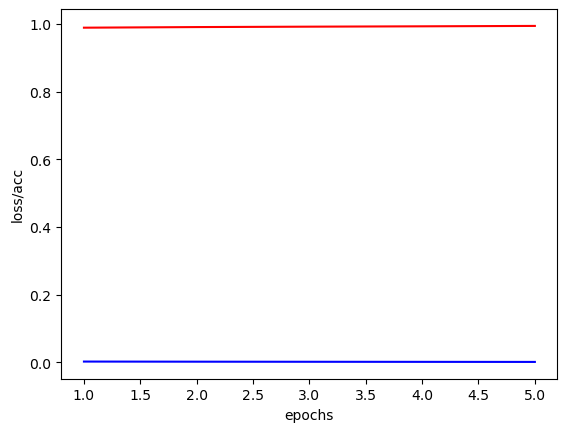

In [104]:
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models

In [106]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

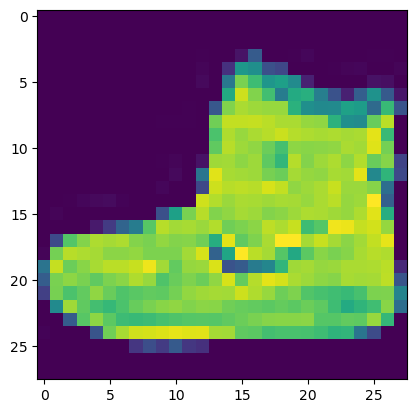

In [107]:
plt.imshow(train_images[0])

In [108]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [109]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [110]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [111]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.8107
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4034 - accuracy: 0.8575
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.3669 - accuracy: 0.8697
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.3384 - accuracy: 0.8783
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.3218 - accuracy: 0.8842


In [112]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 468us/step - loss: 0.3707 - accuracy: 0.8671


In [113]:
print('Accuracy : ', test_acc)

Accuracy :  0.8671000003814697


In [114]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [115]:
train = pd.read_csv("train.csv", sep = ',')
test = pd.read_csv("test.csv", sep = ',')

In [116]:
train.drop(['SibSp','Parch','Ticket','Embarked','Name','Cabin','PassengerId','Fare','Age'], inplace=True, axis=1)

In [117]:
train.dropna(inplace = True)

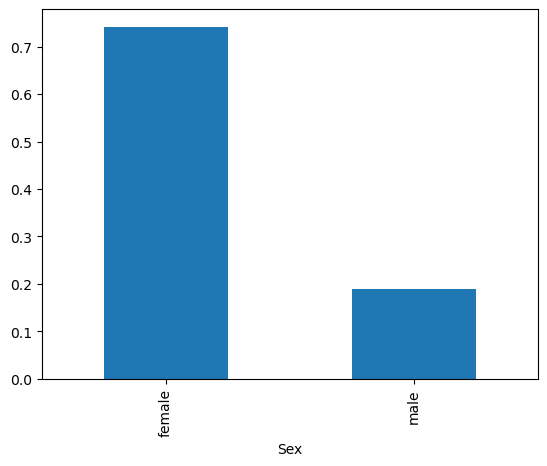

In [118]:
df = train.groupby('Sex').mean()["Survived"]
df.plot(kind='bar')
plt.show()

In [119]:
for ix in train.index:
  if train.loc[ix, 'Sex'] == "male" :
    train.loc[ix, 'Sex'] = 1
  else :
    train.loc[ix, 'Sex'] = 0

In [120]:
target = np.ravel(train.Survived)

In [121]:
train.drop(['Survived'], inplace = True, axis = 1)
train = train.astype(float)

In [122]:
model = models.Sequential()
model.add(tf.keras.layers.Dense(16, activation="relu", input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [123]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(train, target, epochs = 30, batch_size =1, verbose = 1)

Epoch 1/30
891/891 [==============================] - 0s 368us/step - loss: 0.6214 - accuracy: 0.6016
Epoch 2/30
891/891 [==============================] - 0s 438us/step - loss: 0.5501 - accuracy: 0.7396
Epoch 3/30
891/891 [==============================] - 0s 403us/step - loss: 0.5090 - accuracy: 0.7868
Epoch 4/30
891/891 [==============================] - 0s 396us/step - loss: 0.4914 - accuracy: 0.7845
Epoch 5/30
891/891 [==============================] - 0s 365us/step - loss: 0.4838 - accuracy: 0.7868
Epoch 6/30
891/891 [==============================] - 0s 408us/step - loss: 0.4773 - accuracy: 0.7845
Epoch 7/30
891/891 [==============================] - 0s 408us/step - loss: 0.4731 - accuracy: 0.7879
Epoch 8/30
891/891 [==============================] - 0s 401us/step - loss: 0.4672 - accuracy: 0.7912
Epoch 9/30
891/891 [==============================] - 0s 379us/step - loss: 0.4699 - accuracy: 0.7879
Epoch 10/30
891/891 [==============================] - 0s 389us/step - loss: 0.463

In [124]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [125]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [126]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [127]:
train_images, test_images = train_images/255.0, test_images / 255.0

In [128]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))

In [129]:
model.add(layers.MaxPooling2D(2,2))

In [130]:
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [131]:
model.add(layers.MaxPooling2D(2,2))

In [132]:
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [133]:
model.add(layers.Flatten())

In [134]:
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [135]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [136]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [137]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1500 - accuracy: 0.9534
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0458 - accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0338 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0263 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0206 - accuracy: 0.9937
